<a href="https://colab.research.google.com/github/ZafarBukhari/AI-ISB-Q2/blob/master/Deep_Learning/Reuters_News_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuters News - A Multi-Class Classification Problem

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Loading Dataset

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [7]:
print('train_data: ',len(train_data))
print('test_data: ', len(test_data))

train_data:  8982
test_data:  2246


## Preparing the Data

In [8]:
def vectorize_sequences(sequences, dimention=10000):
  results = np.zeros((len(sequences), dimention))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
def to_one_hot(labels, dimention=46):
  results = np.zeros((len(labels), dimention))
  for i, sequence in enumerate(labels):
    results[i, labels] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## OR

In [16]:
one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Building Network

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Compilation

In [19]:
# Using 'categorical_crossentropy'
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 2.5830 - accuracy: 0.5218 - val_loss: 1.7387 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.4247 - accuracy: 0.6902 - val_loss: 1.2976 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0606 - accuracy: 0.7628 - val_loss: 1.1208 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 1s 40ms/step - loss: 0.8314 - accuracy: 0.8135 - val_loss: 1.0192 - val_accuracy: 0.7610
Epoch 5/20
16/16 [==============================] - 1s 40ms/step - loss: 0.6640 - accuracy: 0.8545 - val_loss: 0.9661 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 1s 40ms/step - loss: 0.5291 - accuracy: 0.8877 - val_loss: 0.9176 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.4290 - accuracy: 0.9105 - val_loss: 0.9117 - val_accuracy: 0.8060
Epoch 8/20
16

## Visualization

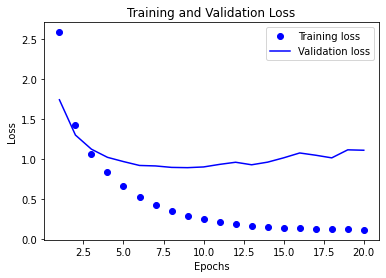

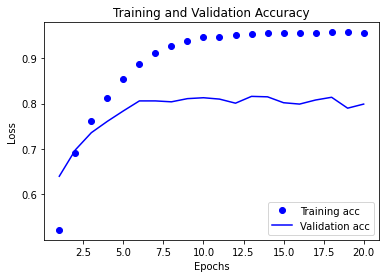

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
predictions = model.predict(x_test)
print(predictions[0])

[6.33705000e-08 1.48592918e-07 2.79741608e-09 9.90167618e-01
 9.26190801e-03 6.12639495e-10 5.26664934e-09 4.15087288e-06
 2.87162780e-04 6.12340784e-07 1.20434720e-06 6.31984149e-05
 3.59880147e-07 2.25014560e-06 8.18206161e-07 1.67990299e-09
 1.16120946e-05 3.41873232e-08 2.82394524e-07 1.67035014e-05
 1.38346804e-04 1.29291163e-06 1.38461616e-08 5.62816524e-07
 5.14461043e-08 4.40200120e-06 3.88626943e-11 3.27975158e-08
 5.23198707e-07 1.34569373e-05 1.54928130e-05 2.32509780e-08
 3.86164061e-08 7.61955565e-09 6.57456553e-07 1.71257412e-07
 1.01870251e-06 2.19834775e-10 1.47549019e-06 3.22636470e-06
 8.80810425e-10 9.35336402e-07 2.43483722e-08 1.63929350e-08
 5.27669641e-08 3.71307829e-09]


In [25]:
predictions[0].sum()

1.0

In [26]:
predictions.shape

(2246, 46)

In [28]:
predictions[0].argmax()

3

## Alternative Approach Labels instead of One_Hot_Encoding

In [29]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [31]:
# Using 'sparse_categorical_crossentropy'
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=20, batch_size=512)

Epoch 1/20
18/18 [==============================] - 1s 38ms/step - loss: 0.2378 - accuracy: 0.9390
Epoch 2/20
18/18 [==============================] - 1s 39ms/step - loss: 0.1585 - accuracy: 0.9488
Epoch 3/20
18/18 [==============================] - 1s 38ms/step - loss: 0.1412 - accuracy: 0.9515
Epoch 4/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1264 - accuracy: 0.9525
Epoch 5/20
18/18 [==============================] - 1s 36ms/step - loss: 0.1206 - accuracy: 0.9552
Epoch 6/20
18/18 [==============================] - 1s 38ms/step - loss: 0.1137 - accuracy: 0.9560
Epoch 7/20
18/18 [==============================] - 1s 36ms/step - loss: 0.1152 - accuracy: 0.9552
Epoch 8/20
18/18 [==============================] - 1s 38ms/step - loss: 0.1102 - accuracy: 0.9548
Epoch 9/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1083 - accuracy: 0.9560
Epoch 10/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1042 - accuracy: 0.9544
Epoch 11/

In [32]:
predictions = model.predict(x_test)
print(predictions[0])

[5.73115642e-07 5.59696900e-07 8.40697789e-10 9.76131678e-01
 2.25506220e-02 1.57192261e-12 2.42226603e-11 5.71040232e-07
 8.32789985e-04 6.00676174e-07 4.13642874e-06 2.15308792e-05
 1.07225112e-07 1.63137986e-06 8.67261249e-08 3.13746841e-11
 1.31211258e-04 2.95075289e-08 3.21910143e-08 9.34030468e-05
 2.19318157e-04 9.34980449e-07 2.91242030e-10 5.04576064e-07
 1.74164239e-09 1.29009209e-06 3.62610527e-15 1.01918210e-10
 7.93523384e-07 1.40118993e-06 1.79834683e-06 1.28576349e-12
 6.55716237e-09 1.62729361e-11 1.03725142e-07 1.29873552e-08
 4.05713621e-07 2.17612300e-11 3.86527654e-06 1.14631426e-07
 6.22434271e-10 1.07204610e-08 9.56600164e-12 1.13601246e-11
 1.33117063e-12 1.37504712e-11]


In [33]:
predictions[0].sum()

1.0000001

In [34]:
predictions[0].argmax()

3